In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import make_pipeline,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [3]:
laptop_data=pd.read_csv("laptop_price.csv",encoding="latin-1")

In [4]:
laptop_data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [5]:
len(laptop_data["Inches"].unique())

18

In [6]:
laptop_data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
laptop_data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [50]:
#testing
def transformer(dataset):
    encoder=OrdinalEncoder(dtype=int)
    wt=[]
    ram=[]
    x_res=[]
    y_res=[]
    all_res=[]
    scrn_type=[]
    cpu_freq=[]
    cpu_type=[]
    for i in list(dataset.columns):
        X=dataset[i]
        if i=='Weight':
            for j in X:
                wt.append(float(j.split("kg")[0]))
            dataset.drop("Weight",axis=1,inplace=True)
            dataset["Weight(kg)"]=wt
        
        elif i=="Ram":
            for j in X:
                ram.append(int(j.split("GB")[0]))
            
            dataset.drop("Ram",axis=1,inplace=True)
            dataset["Ram(GB)"]=ram
    
        elif i=="ScreenResolution":
            most_freq=X.value_counts().keys()[0]
            for j in X.values:
                temp=re.search(r"(\d{3,4}x\d{3,4})",j).group()
                temp2=j.split(temp)
                temp=temp.split('x')
                if temp2[0]=='':
                    scrn_type.append(most_freq)
                    x_res.append(int(temp[0]))
                    y_res.append(int(temp[1]))
                    all_res.append([most_freq,int(temp[0]),int(temp[1])])
                else:
                    scrn_type.append(temp2[0])
                    x_res.append(int(temp[0]))
                    y_res.append(int(temp[1]))
                    all_res.append([temp2[0],int(temp[0]),int(temp[1])])
            dataset["X_Res"]=x_res
            dataset["Y_Res"]=y_res
            dataset["Screen_type"]=scrn_type
            dataset.drop("ScreenResolution",axis=1,inplace=True)
        elif i=="Cpu":
            for j in X.values:
                temp=re.search(r'(\d{1}.\d{0,2}GHz)',j)
                if temp:
                    temp0=re.split(r'(\d{1}.\d{0,2}GHz)',j)[0]
                    temp=temp.group().split('GHz')[0]
                    if re.search(r'(\d \d)',temp):
                        temp=temp.split(" ")[1]
                        cpu_freq.append(float(temp))
                    else:
                        cpu_freq.append(float(temp))
                
                    cpu_type.append(temp[0])
                else:

                    temp0=re.split(r'(\d{1}GHz)',j)[1]
                    temp=re.search(r'(\d{1}GHz)',j).group().split('GHz')[0]
                    # if re.search(r'(\d \d)',temp):
                    #     temp=temp.split(" ")[1]
                    #     cpu_freq.append(float(temp))
                    # else:
                    cpu_freq.append(float(temp))
                    cpu_type.append(temp0)
            dataset.drop("Cpu",axis=1,inplace=True)
            dataset["Cpu_freq(GHz)"]=cpu_freq
            dataset["Cpu_type"]=cpu_type
        elif i not in ["Ram",'Cpu',"Weight","ScreenResolution","Price_euros","Inches"]:
            dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))   
    dataset["Screen_type"]   =dataset["Screen_type"].replace(to_replace= dataset["Screen_type"] .unique(),value=range(len( dataset["Screen_type"] .unique())))
            
    return dataset

In [52]:
to_check=laptop_data.copy()

In [47]:
to_check.head(0)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


In [12]:
test='0 3'
float(re.search(r'(\d \d)',test).group().split(" ")[1])

3.0

In [53]:
to_check=transformer(to_check)

/tmp/ipykernel_727201/3659292634.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_727201/3659292634.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_727201/3659292634.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [56]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   laptop_ID      1303 non-null   int64  
 1   Company        1303 non-null   int64  
 2   Product        1303 non-null   int64  
 3   TypeName       1303 non-null   int64  
 4   Inches         1303 non-null   float64
 5   Memory         1303 non-null   int64  
 6   Gpu            1303 non-null   int64  
 7   OpSys          1303 non-null   int64  
 8   Price_euros    1303 non-null   float64
 9   X_Res          1303 non-null   int64  
 10  Y_Res          1303 non-null   int64  
 11  Screen_type    1303 non-null   int64  
 12  Cpu_freq(GHz)  1303 non-null   float64
 13  Cpu_type       1303 non-null   object 
 14  Ram(GB)        1303 non-null   int64  
 15  Weight(kg)     1303 non-null   float64
dtypes: float64(4), int64(11), object(1)
memory usage: 163.0+ KB


In [ ]:
to_check.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Memory',
       'Gpu', 'OpSys', 'Price_euros', 'X_Res', 'Y_Res', 'Screen_type',
       'Cpu_freq(GHz)', 'Cpu_type(GHz)', 'Ram(GB)', 'Weight(kg)'],
      dtype='object')

      Inches  Price_euros  X_Res  Y_Res Cpu_freq(GHz) Cpu_type(GHz)  Ram(GB)  \
0       13.3      1339.69   2560   1600           2.3             2        8   
1       13.3       898.94   1440    900           1.8             1        8   
2       15.6       575.00   1920   1080           2.5             2        8   
3       15.4      2537.45   2880   1800           2.7             2       16   
4       13.3      1803.60   2560   1600           3.1             3        8   
...      ...          ...    ...    ...           ...           ...      ...   
1298    14.0       638.00   1920   1080           2.5             2        4   
1299    13.3      1499.00   3200   1800           2.5             2       16   
1300    14.0       229.00   1366    768           1.6             1        2   
1301    15.6       764.00   1366    768           2.5             2        6   
1302    15.6       369.00   1366    768           1.6             1        4   

      Weight(kg)  
0           1.37  
1

array([[<Axes: xlabel='Inches', ylabel='Inches'>,
        <Axes: xlabel='Price_euros', ylabel='Inches'>,
        <Axes: xlabel='X_Res', ylabel='Inches'>,
        <Axes: xlabel='Y_Res', ylabel='Inches'>,
        <Axes: xlabel='Ram(GB)', ylabel='Inches'>,
        <Axes: xlabel='Weight(kg)', ylabel='Inches'>],
       [<Axes: xlabel='Inches', ylabel='Price_euros'>,
        <Axes: xlabel='Price_euros', ylabel='Price_euros'>,
        <Axes: xlabel='X_Res', ylabel='Price_euros'>,
        <Axes: xlabel='Y_Res', ylabel='Price_euros'>,
        <Axes: xlabel='Ram(GB)', ylabel='Price_euros'>,
        <Axes: xlabel='Weight(kg)', ylabel='Price_euros'>],
       [<Axes: xlabel='Inches', ylabel='X_Res'>,
        <Axes: xlabel='Price_euros', ylabel='X_Res'>,
        <Axes: xlabel='X_Res', ylabel='X_Res'>,
        <Axes: xlabel='Y_Res', ylabel='X_Res'>,
        <Axes: xlabel='Ram(GB)', ylabel='X_Res'>,
        <Axes: xlabel='Weight(kg)', ylabel='X_Res'>],
       [<Axes: xlabel='Inches', ylabel='Y_Res'>,


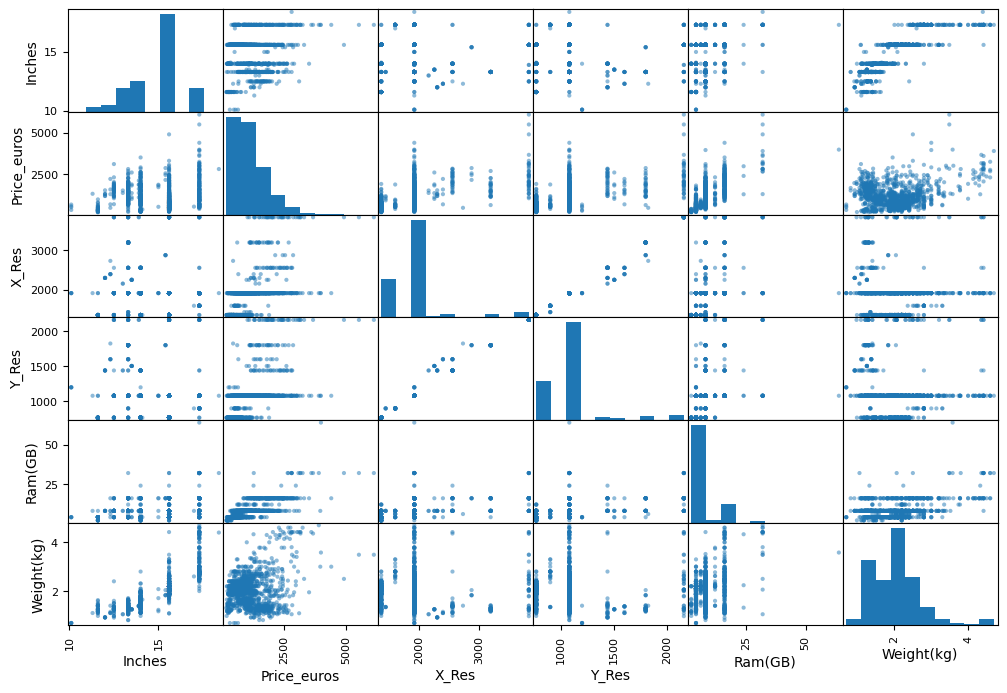

In [ ]:
to_check_numeric=to_check.drop(columns=['laptop_ID', 'Company', 'Product', 'TypeName', 'Memory',
       'Gpu', 'OpSys', 'Screen_type'])
print(to_check_numeric)
scatter_matrix(to_check_numeric,figsize=(12,8))

In [68]:
laptop_data["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company', ylabel='count'>

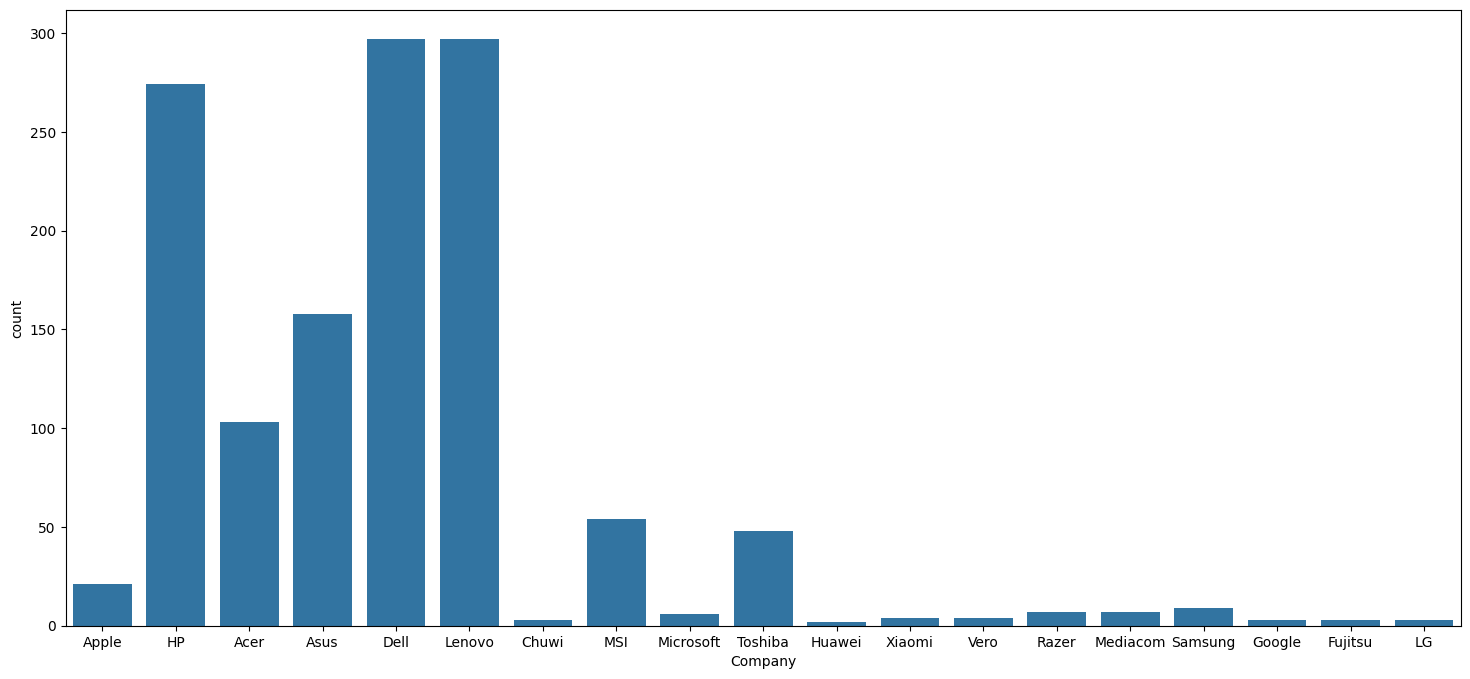

In [75]:
plt.figure(figsize=(18,8))
sns.countplot(data=laptop_data,x="Company")

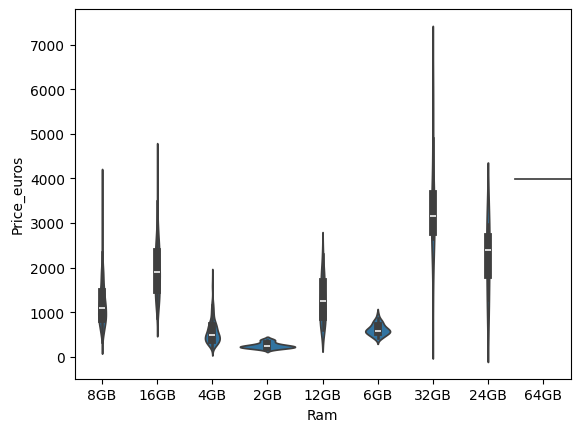

In [ ]:
sns.violinplot(data=laptop_data,x="Ram",y="Price_euros",width=1)
plt.show()

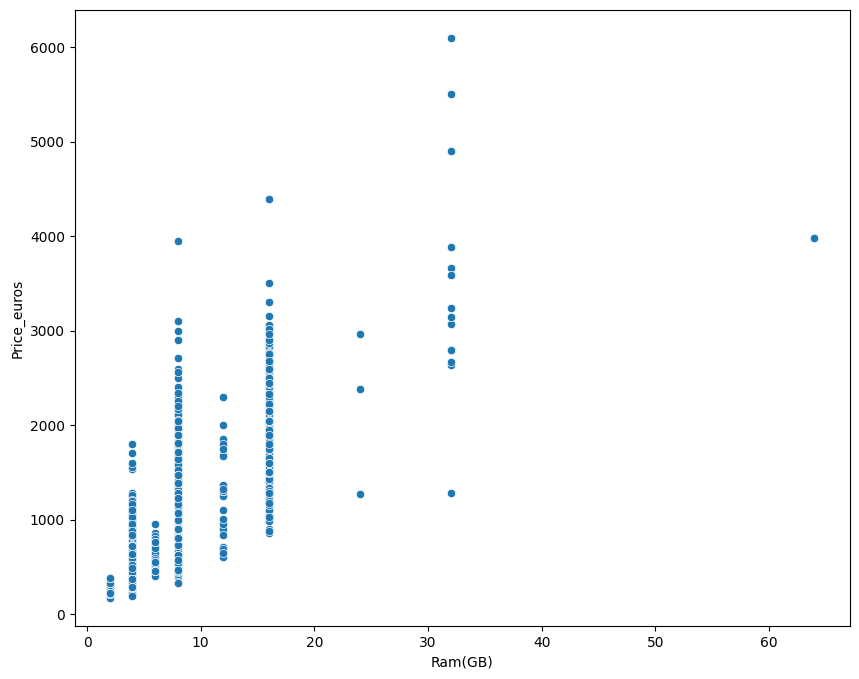

In [63]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=to_check,x="Ram(GB)",y="Price_euros")
plt.show()

In [87]:
to_check["Y_Res"]

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_Res, Length: 1303, dtype: int64

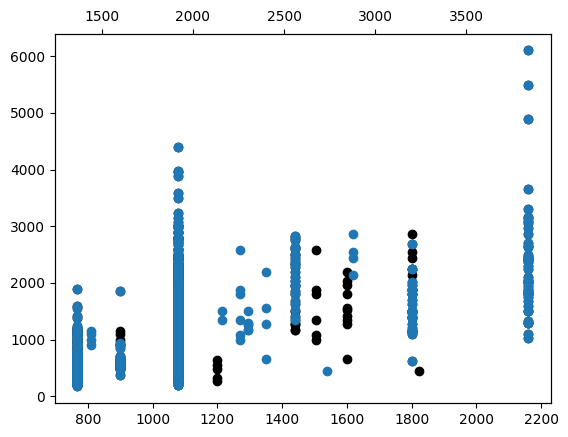

In [92]:
x1=plt.subplot()
x2=plt.twiny()
x2.scatter(to_check["X_Res"],to_check["Price_euros"])
x1.scatter(to_check["Y_Res"],to_check["Price_euros"],color="black")
plt.show()

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
features=to_check.drop("Price_euros",axis=1)
label=to_check["Price_euros"]

In [96]:
# train_features

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [104]:
stratify=['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Memory',
       'Gpu', 'OpSys', 'X_Res', 'Y_Res', 'Screen_type',
       'Cpu_freq(GHz)', 'Cpu_type', 'Ram(GB)', 'Weight(kg)']

In [106]:
trainx,trainy,testx,testy=train_test_split(features,label,test_size=0.2)

In [107]:
trainx

,laptop_ID,Company,Product,TypeName,Inches,Memory,Gpu,OpSys,X_Res,Y_Res,Screen_type,Cpu_freq(GHz),Cpu_type,Ram(GB),Weight(kg)
217,217,1,75,1,14.0,2,19,2,1920,1080,2,1.8,1,8,1.63
614,614,4,286,1,15.6,4,2,4,1366,768,1,2.6,2,4,1.93
309,309,1,2,1,15.6,6,9,2,1920,1080,2,2.0,2GHz,4,1.86
426,426,4,16,1,15.6,12,18,2,1920,1080,2,1.8,1,8,2.02
1215,1215,2,587,2,11.6,13,20,7,1366,768,1,1.5,1,2,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,800,1,306,5,15.6,2,80,2,1920,1080,2,2.8,2,8,3.14
394,394,4,83,1,15.6,2,37,4,1920,1080,2,2.7,2,8,2.33
685,685,4,368,3,15.6,11,30,2,1920,1080,2,2.9,2,16,3.49
69,69,3,46,3,17.3,6,31,4,1920,1080,2,2.8,2,12,3.00
